In [93]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {
    "axes.spines.right": False, 
    "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params, font_scale=1.45)

## General Performance

In [94]:
# load general_performance.csv in a dataframe
df_gp = pd.read_csv("general_performance.csv")
# rename columns Unnamed: 0 to ""
df_gp = df_gp.rename(columns={"Unnamed: 0": ""})
# set index to ""
df_gp = df_gp.set_index("")
df_gp

,c,python,java
,,,
initialize,1.252786,0.638989,5.512573
compile,0.060677,0.000000,0.602499
load_code,0.009731,0.143787,0.015050
execute,0.174659,3.230006,2.311504


## Load code performance

                c      python        java
count  100.000000  100.000000  100.000000
mean     0.007510    0.144247    0.017734
std      0.001006    0.002846    0.002955
min      0.005990    0.139448    0.013061
25%      0.006733    0.142922    0.015592
50%      0.007272    0.143103    0.017099
75%      0.008236    0.146264    0.019604
max      0.010698    0.153156    0.027437


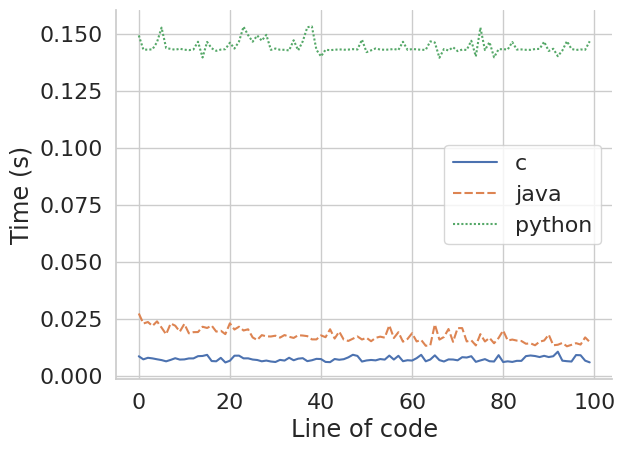

In [97]:
df_lcp = pd.read_csv("load_code_performance.csv")
# drop first column
df_lcp = df_lcp.drop(columns=["Unnamed: 0"])
print(df_lcp.describe())
# swap order of columns
df_lcp = df_lcp[["c", "java", "python"]]
with sns.plotting_context(font_scale=1.8):
    sns.lineplot(data=df_lcp)
    plt.xlabel("Line of code")
    plt.ylabel("Time (s)")

                c        java
count  100.000000  100.000000
mean     0.063398    0.580957
std      0.008519    0.034587
min      0.052465    0.517549
25%      0.056884    0.554508
50%      0.061104    0.577763
75%      0.068001    0.601341
max      0.095627    0.728399


Text(0, 0.5, 'Time (s)')

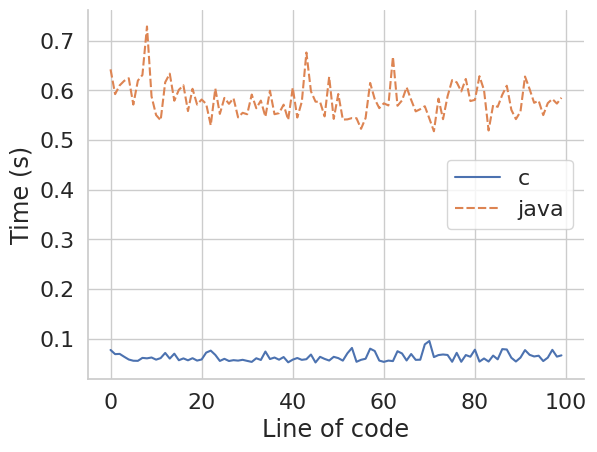

In [99]:
df_ccp = pd.read_csv("compile_code_performance.csv")
# drop first column
df_ccp = df_ccp.drop(columns=["Unnamed: 0"])
print(df_ccp.describe())
sns.lineplot(data=df_ccp)
plt.xlabel("Line of code")
plt.ylabel("Time (s)")

## Execute code performance

Text(0, 0.5, 'Time (s)')

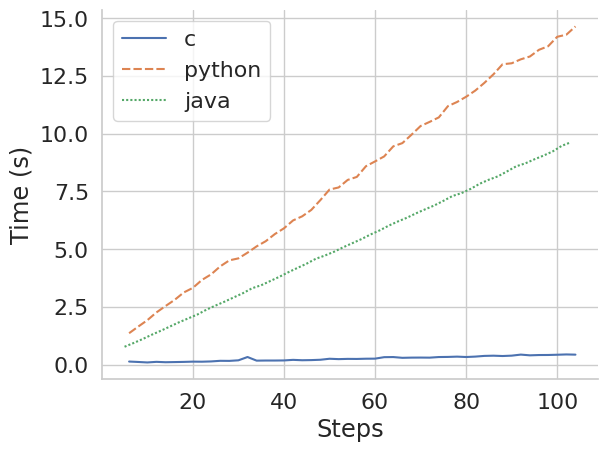

In [102]:
df_ep = pd.read_csv("execute_performance.csv")
# rename columns Unnamed: 0 to steps
df_ep = df_ep.rename(columns={"Unnamed: 0": "steps"})
# set index to steps
df_ep = df_ep.set_index("steps")
sns.lineplot(data=df_ep)
plt.xlabel("Steps")
plt.ylabel("Time (s)")

               c     python       java
count  50.000000  50.000000  50.000000
mean    0.005812   0.154495   0.100288
std     0.003180   0.017804   0.011440
min     0.004163   0.140066   0.093265
25%     0.004378   0.145273   0.094420
50%     0.004577   0.147612   0.095757
75%     0.005907   0.153000   0.100503
max     0.022826   0.227264   0.155377


Text(0, 0.5, 'Time (s)')

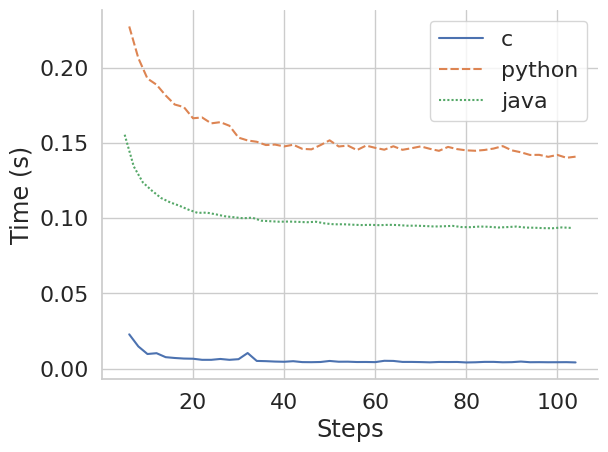

In [103]:
#time per step
df_tps = df_ep.copy()
df_tps.index = df_tps.index.astype(int)
df_tps = df_tps.div(df_tps.index, axis=0)
print(df_tps.describe())
sns.lineplot(data=df_tps)
plt.xlabel("Steps")
plt.ylabel("Time (s)")

## Binary Search Scenario

In [104]:
import json
with open("scenario/binary_search_c_times.json", 'r') as file:
    bsc_data = json.load(file)

with open("scenario/binary_search_python_times.json", 'r') as file:
    bspy_data = json.load(file)
    
with open("scenario/binary_search_java_times.json", 'r') as file:
    bsj_data = json.load(file)
sns.set_theme(style="white", rc=custom_params, font_scale=1.8)

In [115]:
def plot_scenario(data, init):
    df_bsc_data = pd.DataFrame(data).T
    # make index as int and column
    df_bsc_data.index = df_bsc_data.index.astype(int)
    #add init for the first step
    df_bsc_data.loc[0] += init
    #plot the exec time on y axi on the left and step on y axis on the right
    g = sns.lineplot(data=df_bsc_data["exec"], color="red")
    plt.ylabel("Time (s)")
    # plot step on y axis on the right
    h = sns.lineplot(data=df_bsc_data["step"], ax=g.twinx(), color="blue")
    # x axis step in int
    plt.xlabel("Versions")
    plt.ylabel("Stack Recording Size")
    # make the tick on x axis int and not float
    g.xaxis.set_major_locator(plt.MaxNLocator(10))
    # add labels (blue = tim and red = size)
    plt.legend(handles=[g.lines[0], h.lines[0]], labels=["Time", "Stack Recording Size"],
        )

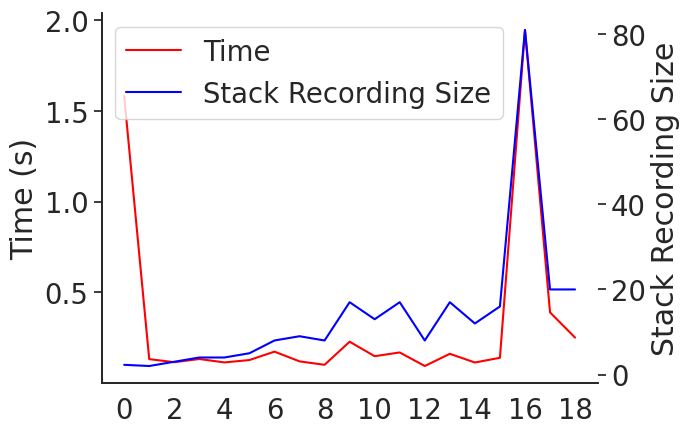

In [116]:
plot_scenario(bsc_data["scenario"],float(bsc_data["init"]))

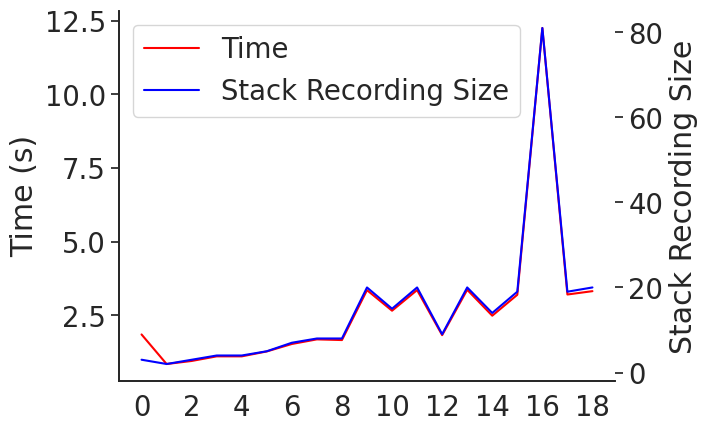

In [117]:
plot_scenario(bspy_data["scenario"],float(bspy_data["init"]))

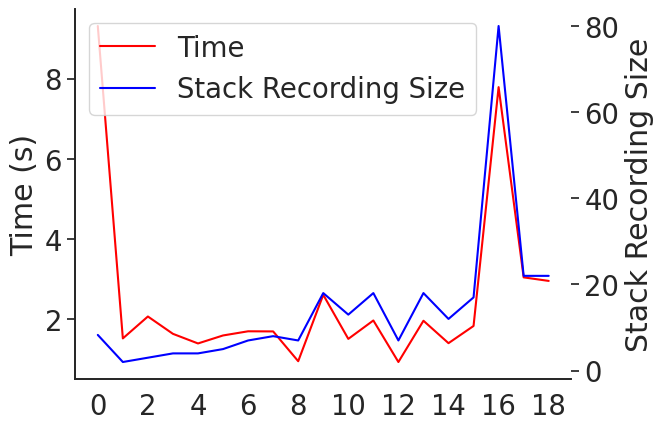

In [118]:
plot_scenario(bsj_data["scenario"],float(bsj_data["init"]))